In [41]:
#Predicting Relative humidy using 11 features of Air Quality data

In [10]:
import numpy as np
import pandas as pd
import sklearn

In [175]:
AirQuality = pd.read_csv("AirQuality.csv") 

In [206]:
AirQuality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/3/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/3/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/3/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/3/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [207]:
AirQuality.columns 

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [157]:
AirQuality.shape

(9357, 11)

In [158]:
AQ = pd.DataFrame(AirQuality.loc[:, "CO(GT)": "T"]) #RH and AH should be removed from input matrix and RH is used as Target.

In [165]:
AQ.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2


In [182]:
Target = np.array(AirQuality["RH"]) #relative humidity is selected as target matrix

In [183]:
Target

array([48.9, 47.7, 54. , ..., 18.3, 13.5, 13.1])

In [186]:
X = (AQ - AQ.mean())/(AQ.max()-AQ.min()) #normalizing input/design matrix since our features have different ranges.

In [188]:
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T
0,0.173702,0.138844,0.222527,0.038052,0.062719,-0.001559,0.090534,0.101576,0.101015,0.107575,0.015624
1,0.170871,0.108487,0.195169,0.028572,0.025023,-0.039081,0.131464,0.062687,0.056309,-0.001128,0.014398
2,0.171815,0.157594,0.177891,0.027055,0.018395,-0.022404,0.119670,0.103428,0.054965,0.036331,0.008674
3,0.171815,0.145987,0.172131,0.027813,0.022123,0.002015,0.103021,0.118243,0.064713,0.083705,0.004995
4,0.168983,0.099558,0.151253,0.017574,-0.024273,-0.022404,0.142216,0.107132,0.033116,0.049551,0.005812


In [189]:
y = Target

In [190]:
y.shape

(9357,)

In [191]:
from sklearn.model_selection import train_test_split 

In [192]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = 5) 
#splitting datas into training set using imported function

In [193]:
X_train.shape

(6269, 11)

In [194]:
X_train = X_train.T # we require input matrix to have training sets across the rows

In [195]:
X_train.shape

(11, 6269)

In [196]:
y_train.shape

(6269,)

In [197]:
#we need y_train of dimension 1*m_train where m_train = number of training examples
y_train = np.array([y_train])

In [198]:
y_train.shape

(1, 6269)

In [199]:
#our model needs X validation of dimension (number of features x number validation examples)
X_val = X_val.T

In [208]:
X_val.shape

(11, 3088)

In [209]:
#we need y_val of dimension 1xm_val = number of training examples
y_val = np.array([y_val])

In [210]:
y_val.shape

(1, 1, 3088)

In [211]:
#Defining out LR model
import matplotlib.pyplot as plt

#step 1, initalize parameters(w,b)
def initialize_parameters(lenw):
    w = np.random.randn(1, lenw) #generate matrix of dim(1Xlenw) with random values
    # w = np.zeros(1,lenw) generates matrix of dim(1Xlenw) with zeros
    b = 0
    return w,b

#step 2, define Z vector containing linear functions(W*X+b)for each training examples
def forward_prop(X,w,b):
    z = np.dot(w,X)+b # w--> 1xn, X-->nxm , z -->1xm
    return z

#step 3, calculate cost function each for values generated by linear functions
def cost_function(z,y): # y is acutal value of dim 1xm
    m = y.shape[1]
    J= 1/(2*m)*np.sum(np.square(z-y))
    return J 
    
#step 4, find changes required in w and b with respect to J(back propagation)
def back_prop(X,y,z):
    #dj/dz = 1/m(z-y)
    m =y.shape[1]
    dz = (1/m) * (z -y)
     #dj/dw = dj/dz * X.Transpose(dz/dw) dw--> 1xn
    dw = np.dot(dz, X.T)
     #dj/db = sum(dj/dz)i(1-m)
    db = np.sum(dz)
    return dw, db
#step 5, update w and b
def gradient_descent_update(w, b, dw, db, learning_rate):
        w = w- learning_rate*dw 
        b = b- learning_rate *db
        return w,b 
def linear_regression_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
        lenw = X_train.shape[0]
        w,b = initialize_parameters(lenw) #step 1
        costs_train = []
        m_train = y_train.shape[1]
        m_val = y_val.shape[1]
        
        for i in range (0, epochs):
            z_train = forward_prop(X_train, w,b) #step 2
            cost_train = cost_function(z_train, y_train) #step 3
            dw,db = back_prop(X_train, y_train, z_train) #step 4
            w,b = gradient_descent_update(w,b,dw,db,learning_rate) #step 5
            
            #store training cost in a list for plotting purpose
            if i%10 == 0 :# for every tenth iteration store
                costs_train.append(cost_train)
            #Mean absolute error
            MAE_train = (1/m_train)*np.sum(np.abs(z_train-y_train))
            
            #cost function for validation set, MAE for validation set
            z_val = forward_prop(X_val, w,b) #step 2
            cost_val = cost_function(z_val, y_val)
            MAE_val =(1/m_val)*np.sum(np.abs(z_val-y_val))
            
            #print out cost_train, cost_val , MAE_train, MAE_val
            
            print('Epochs ' +str(i)+ '/' +str(epochs)+' : ')
            print('Training cost '+str(cost_train)+ '|'+' Validation cost ' +str(cost_val))
            print('Training cost '+str(MAE_train)+ '|'+' Validation cost ' +str(MAE_val))
            
        plt.plot(costs_train)
        plt.xlabel('Iteratons(per tens)')
        plt.ylabel('Training cost')
        plt.title('Learning rate ' +str(learning_rate))
        plt.show()

Epochs 0/500 : 
Training cost 2026.167091423257| Validation cost 4875773.50380043
Training cost 54.625281712942346| Validation cost 124485.60392419554
Epochs 1/500 : 
Training cost 1433.171933267681| Validation cost 4099495.236213615
Training cost 39.17986477689215| Validation cost 99266.46686261051
Epochs 2/500 : 
Training cost 1177.1963131870614| Validation cost 3688910.5524425134
Training cost 30.860333813842114| Validation cost 86868.26702474625
Epochs 3/500 : 
Training cost 1046.2216575229602| Validation cost 3416887.6107588354
Training cost 26.8200183179474| Validation cost 80391.99934506856
Epochs 4/500 : 
Training cost 963.592273117478| Validation cost 3202784.9398455825
Training cost 24.758181175974716| Validation cost 76769.58264120607
Epochs 5/500 : 
Training cost 901.4108317631825| Validation cost 3017876.671584646
Training cost 23.638548820266372| Validation cost 74567.45776212148
Epochs 6/500 : 
Training cost 849.3597749194439| Validation cost 2851677.908333912
Training c

Epochs 93/500 : 
Training cost 234.3773528855044| Validation cost 744744.0028853962
Training cost 17.949018868973344| Validation cost 56565.76574204974
Epochs 94/500 : 
Training cost 233.66498643994123| Validation cost 742460.7480501508
Training cost 17.921793337198327| Validation cost 56478.32523189098
Epochs 95/500 : 
Training cost 232.96539856314652| Validation cost 740220.3131918693
Training cost 17.89507547999254| Validation cost 56391.66242268821
Epochs 96/500 : 
Training cost 232.27821549729111| Validation cost 738021.3579475202
Training cost 17.86876815973945| Validation cost 56305.843580320965
Epochs 97/500 : 
Training cost 231.60307899802083| Validation cost 735862.6005208229
Training cost 17.84272995324117| Validation cost 56221.10206180791
Epochs 98/500 : 
Training cost 230.9396454390274| Validation cost 733742.8142864706
Training cost 17.8169857080344| Validation cost 56137.32256591056
Epochs 99/500 : 
Training cost 230.28758498290063| Validation cost 731660.8246380374
Tra

Epochs 224/500 : 
Training cost 189.53312307607172| Validation cost 602453.1623299262
Training cost 16.009033704175543| Validation cost 50378.58937637382
Epochs 225/500 : 
Training cost 189.35735445928876| Validation cost 601892.8178096828
Training cost 16.000802219403226| Validation cost 50352.80952491271
Epochs 226/500 : 
Training cost 189.18272108250136| Validation cost 601336.038594869
Training cost 15.992627927395048| Validation cost 50327.21928104783
Epochs 227/500 : 
Training cost 189.00920979064958| Validation cost 600782.7840412899
Training cost 15.984506407659584| Validation cost 50301.839033633296
Epochs 228/500 : 
Training cost 188.8368076523749| Validation cost 600233.0141966077
Training cost 15.976425166903919| Validation cost 50276.68444686638
Epochs 229/500 : 
Training cost 188.66550195501637| Validation cost 599686.6897845687
Training cost 15.968391983573488| Validation cost 50251.63440353541
Epochs 230/500 : 
Training cost 188.4952801997415| Validation cost 599143.772

Epochs 356/500 : 
Training cost 172.9386835872993| Validation cost 549378.0757052029
Training cost 15.22678869238084| Validation cost 47921.46344904531
Epochs 357/500 : 
Training cost 172.8473994920135| Validation cost 549085.663811387
Training cost 15.222475536385101| Validation cost 47907.65429916339
Epochs 358/500 : 
Training cost 172.75646853237413| Validation cost 548794.3846637076
Training cost 15.218182874928257| Validation cost 47893.87796676406
Epochs 359/500 : 
Training cost 172.66588826467841| Validation cost 548504.2305194462
Training cost 15.213902263504897| Validation cost 47880.15910292587
Epochs 360/500 : 
Training cost 172.5756562688911| Validation cost 548215.1937091881
Training cost 15.209639272076924| Validation cost 47866.48089368762
Epochs 361/500 : 
Training cost 172.48577014834177| Validation cost 547927.266635905
Training cost 15.205393161179297| Validation cost 47852.83484366192
Epochs 362/500 : 
Training cost 172.39622752942753| Validation cost 547640.4417740

Epochs 494/500 : 
Training cost 162.887893319685| Validation cost 517210.94986071857
Training cost 14.754681506300349| Validation cost 46398.50743632937
Epochs 495/500 : 
Training cost 162.82931670596088| Validation cost 517023.73990432674
Training cost 14.751954027106803| Validation cost 46389.55387689236
Epochs 496/500 : 
Training cost 162.77089587157477| Validation cost 516837.0315934752
Training cost 14.74923785263186| Validation cost 46380.63753475758
Epochs 497/500 : 
Training cost 162.71263001569469| Validation cost 516650.8223460447
Training cost 14.74652991125608| Validation cost 46371.79015428276
Epochs 498/500 : 
Training cost 162.6545183428923| Validation cost 516465.10959724884
Training cost 14.743828969955164| Validation cost 46362.97363937566
Epochs 499/500 : 
Training cost 162.59656006309478| Validation cost 516279.8907994828
Training cost 14.741131982438471| Validation cost 46354.171110258125


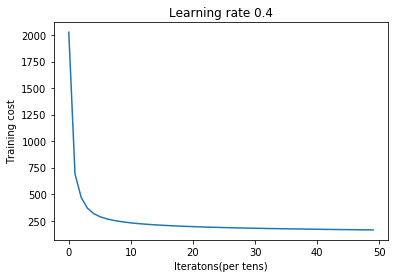

In [212]:
linear_regression_model(X_train,y_train,X_val,y_val,0.4,500) 
# feeding data to our LR model with learning rate 0.4 upto 500 iterations

In [ ]:
#error at 1st iteration was 2026 whcich is reduced to 162 after 500 iterations.